In [52]:
import pandas as pd

df = pd.read_csv('tweets.csv', encoding='Latin')
df = df.sample(n=20000, random_state=42)  

df = df.drop_duplicates()
df = df.dropna()
df.head()

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
4385281,887340519977869312,RT @UnitedHealthGrp: $UNH Wichmann: UNH genera...,27533449,0,0,887293878520483840,917104380,en,"<a href=""http://twitter.com/download/iphone"" r...",Tue Jul 18 15:57:20 +0000 2017
1425403,872476805768282113,Nice shake out of weak hands yesterday MM's W...,840817404,0,0,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Wed Jun 07 15:34:14 +0000 2017
2171408,876082902244540416,RT @MOMOSTOCKTRADES: $VDRM $CNBX $OWCP $USRM $...,834749008044244992,0,0,876081585686237184,234956680,tl,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Sat Jun 17 14:23:35 +0000 2017
3564549,883029194942402560,Commercial Metals Company director just picked...,2616445050,0,0,0,0,en,"<a href=""http://www.conferencecalltranscripts....",Thu Jul 06 18:25:40 +0000 2017
7335060,900024884318883843,Hunting for stocks to short? Here's one w/ a l...,3254642543,0,0,0,0,en,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Tue Aug 22 16:00:28 +0000 2017


In [53]:
df = df[['text', 'created_at']] # We just need these two columns
# Convert the created_at column to a datetime type
df["created_at"] = pd.to_datetime(df["created_at"])

df.head()

,text,created_at
4385281,RT @UnitedHealthGrp: $UNH Wichmann: UNH genera...,2017-07-18 15:57:20+00:00
1425403,Nice shake out of weak hands yesterday MM's W...,2017-06-07 15:34:14+00:00
2171408,RT @MOMOSTOCKTRADES: $VDRM $CNBX $OWCP $USRM $...,2017-06-17 14:23:35+00:00
3564549,Commercial Metals Company director just picked...,2017-07-06 18:25:40+00:00
7335060,Hunting for stocks to short? Here's one w/ a l...,2017-08-22 16:00:28+00:00


In [54]:
companies = pd.read_csv('companies.csv', encoding='Latin')
companies = companies[['ticker', 'capitalization']]
companies.head()

,ticker,capitalization
0,A,1.915000e+10
1,AA,6.480000e+09
2,AAAG,9.480000e+06
3,AAAIF,7.840000e+06
4,AAALF,1.720000e+09


Now, I'm going to fins the CashTags of each tweet which are in the companies dataset and add a column to df to show the CashTags of its corresponding tweet

In [55]:
import re

# Define a function to extract CashTags from a tweet
def extract_cashtags(tweet):
  # Find all the words that start with $ and are followed by alphanumeric characters
  cashtags = re.findall(r"\$[A-Za-z0-9]+", tweet)
  # Return the cashtags as a list
  return cashtags

# Apply the function to the text column
df["CashTags"] = df["text"].apply(extract_cashtags)

valid_cashtags = companies["ticker"].values

# Define a function to filter CashTags
def filter_cashtags(cashtags):
  # Check if each cashtag is in the ticker column of the companies data frame
  filtered = [cashtag[1:] for cashtag in cashtags if cashtag[1:] in valid_cashtags]
  # Return the filtered cashtags as a list
  return filtered
# Apply the function to the CashTags column
df["CashTags"] = df["CashTags"].apply(filter_cashtags)

# Print the first 5 rows of the data frame
df.head()

,text,created_at,CashTags
4385281,RT @UnitedHealthGrp: $UNH Wichmann: UNH genera...,2017-07-18 15:57:20+00:00,[UNH]
1425403,Nice shake out of weak hands yesterday MM's W...,2017-06-07 15:34:14+00:00,[NKE]
2171408,RT @MOMOSTOCKTRADES: $VDRM $CNBX $OWCP $USRM $...,2017-06-17 14:23:35+00:00,"[VDRM, CNBX, OWCP, USRM, AAPL, FB, GOOG, ZNGA,..."
3564549,Commercial Metals Company director just picked...,2017-07-06 18:25:40+00:00,[CMC]
7335060,Hunting for stocks to short? Here's one w/ a l...,2017-08-22 16:00:28+00:00,[FMI]


In [56]:
# Drop the rows that have empty lists in the Filtered CashTags column
df = df[df["CashTags"].str.len() > 0]
df.head()

,text,created_at,CashTags
4385281,RT @UnitedHealthGrp: $UNH Wichmann: UNH genera...,2017-07-18 15:57:20+00:00,[UNH]
1425403,Nice shake out of weak hands yesterday MM's W...,2017-06-07 15:34:14+00:00,[NKE]
2171408,RT @MOMOSTOCKTRADES: $VDRM $CNBX $OWCP $USRM $...,2017-06-17 14:23:35+00:00,"[VDRM, CNBX, OWCP, USRM, AAPL, FB, GOOG, ZNGA,..."
3564549,Commercial Metals Company director just picked...,2017-07-06 18:25:40+00:00,[CMC]
7335060,Hunting for stocks to short? Here's one w/ a l...,2017-08-22 16:00:28+00:00,[FMI]


## Cleaning

In [57]:
# Import libraries
import re
import nltk
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))

# Define a function to preprocess tweets
def preprocess_tweet(tweet):
  # Remove URLs
  tweet = re.sub(r"http\S+", "", tweet)
  # Remove mentions
  tweet = re.sub(r"@\w+", "", tweet)
  # Remove hashtags
  tweet = re.sub(r"#\w+", "", tweet)
  # Remove CashTags
  tweet = re.sub(r'\$[^\s]+', '', tweet) 
  # Remove punctuation
  tweet = re.sub(r"[^\w\s]", "", tweet)
  # Convert to lowercase
  tweet = tweet.lower()
  # Remove stopwords
  tweet = tweet.split()
  tweet = [word for word in tweet if word not in stopWords]
  # Join words back
  tweet = " ".join(tweet)
  return tweet

# Apply the function to the tweet column
df["text"] = df["text"].apply(preprocess_tweet)

df.head(10)

,text,created_at,CashTags
4385281,rt wichmann unh generated strong cash flows 29...,2017-07-18 15:57:20+00:00,[UNH]
1425403,nice shake weak hands yesterday mms onto mofoz,2017-06-07 15:34:14+00:00,[NKE]
2171408,rt hâ,2017-06-17 14:23:35+00:00,"[VDRM, CNBX, OWCP, USRM, AAPL, FB, GOOG, ZNGA,..."
3564549,commercial metals company director picked 1692...,2017-07-06 18:25:40+00:00,[CMC]
7335060,hunting stocks short heres one w low piotroski...,2017-08-22 16:00:28+00:00,[FMI]
896297,janssen return rights min202 minerva jampjs ac...,2017-05-31 21:02:35+00:00,[NERV]
7459211,posible seãal para corto confirmaciã³n en sl,2017-08-24 00:47:02+00:00,[ALV]
9082825,sept 12 tuesday closed hit bullish target,2017-09-12 20:09:45+00:00,[NFLX]
9019202,rt watch tonights video,2017-09-12 08:51:13+00:00,"[GLD, SPY, IWM, TEVA, QQQ, DIA, FXI, EWZ]"
5029083,rt energymaterials top gainers losers 200 pm,2017-07-26 18:02:55+00:00,"[NOG, SNES, TMQ, MCF]"


In [58]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatization(tweet):
    # Tokenize tweet
    tokens = word_tokenize(tweet)
    # Lemmatize the tokens and then concatenate
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_tweet = ' '.join(tokens)
    return lemmatized_tweet

df["text"] = df["text"].apply(lemmatization)

df.head(10)

,text,created_at,CashTags
4385281,rt wichmann unh generated strong cash flow 29 ...,2017-07-18 15:57:20+00:00,[UNH]
1425403,nice shake weak hand yesterday mm onto mofoz,2017-06-07 15:34:14+00:00,[NKE]
2171408,rt hâ,2017-06-17 14:23:35+00:00,"[VDRM, CNBX, OWCP, USRM, AAPL, FB, GOOG, ZNGA,..."
3564549,commercial metal company director picked 1692 ...,2017-07-06 18:25:40+00:00,[CMC]
7335060,hunting stock short here one w low piotroski s...,2017-08-22 16:00:28+00:00,[FMI]
896297,janssen return right min202 minerva jampjs act...,2017-05-31 21:02:35+00:00,[NERV]
7459211,posible seãal para corto confirmaciã³n en sl,2017-08-24 00:47:02+00:00,[ALV]
9082825,sept 12 tuesday closed hit bullish target,2017-09-12 20:09:45+00:00,[NFLX]
9019202,rt watch tonight video,2017-09-12 08:51:13+00:00,"[GLD, SPY, IWM, TEVA, QQQ, DIA, FXI, EWZ]"
5029083,rt energymaterials top gainer loser 200 pm,2017-07-26 18:02:55+00:00,"[NOG, SNES, TMQ, MCF]"


As you can see, it works correctly and comparing the above table with its previous one, if you for example look at row number 2, the 's' character from 'times' is removed. The same is established for its next row for 'feels' verb. 

In [59]:
df.to_csv('cleaned_data_part3.csv', index=False)

# Loading models

## TF-IDF

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from transformers import AutoConfig
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import joblib
from scipy.special import softmax

# Load the tf-idf model from a file
tfidf_model = joblib.load("best_tfidf_model.pkl")
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Section 1

In [62]:
# Define a function to apply the majority voting scheme to a tweet
def majority_voting(tweet):
  # Get the prediction and probability from the tf-idf model
  tfidf_pred = tfidf_model.predict([tweet])[0]
  tfidf_prob = max(tfidf_model.predict_proba([tweet])[0])
  # Get the prediction and probability from the roberta model
  encoded_input = tokenizer(tweet, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  #print(scores)
  if scores[2] >= scores[0]:
        roberta_label = 1
        roberta_prob = scores[2]
  else:
        roberta_label = 0
        roberta_prob = -scores[0]
  # Convert the predictions to binary labels
  tfidf_label = 1 if tfidf_pred == 4 else 0
  if tfidf_label == 0:
    tfidf_prob = -tfidf_prob
  # If the predictions are the same, return the label
  if tfidf_label == roberta_label:
    return tfidf_label, tfidf_label, tfidf_label
  # If the predictions are different, apply the weighted score
  else:
    final_score = 0.9 * roberta_prob + 0.1 * tfidf_prob
    
  decision =  1 if final_score > 0 else 0
  
      # If the score is positive, return 1, else return 0
  return decision, roberta_label, tfidf_label
  
# Apply the function to the text column
df[["Majority Vote", "Roberta Label", "TfIdf Label"]] = df["text"].apply(majority_voting).apply(pd.Series)

# Print the first 10 rows of the data frame
df.head(10)

,text,created_at,CashTags,Majority Vote,Roberta Label,TfIdf Label
4385281,rt wichmann unh generated strong cash flow 29 ...,2017-07-18 15:57:20+00:00,[UNH],1,1,0
1425403,nice shake weak hand yesterday mm onto mofoz,2017-06-07 15:34:14+00:00,[NKE],0,0,1
2171408,rt hâ,2017-06-17 14:23:35+00:00,"[VDRM, CNBX, OWCP, USRM, AAPL, FB, GOOG, ZNGA,...",1,1,1
3564549,commercial metal company director picked 1692 ...,2017-07-06 18:25:40+00:00,[CMC],1,1,1
7335060,hunting stock short here one w low piotroski s...,2017-08-22 16:00:28+00:00,[FMI],0,0,0
896297,janssen return right min202 minerva jampjs act...,2017-05-31 21:02:35+00:00,[NERV],1,1,0
7459211,posible seãal para corto confirmaciã³n en sl,2017-08-24 00:47:02+00:00,[ALV],1,1,1
9082825,sept 12 tuesday closed hit bullish target,2017-09-12 20:09:45+00:00,[NFLX],1,1,0
9019202,rt watch tonight video,2017-09-12 08:51:13+00:00,"[GLD, SPY, IWM, TEVA, QQQ, DIA, FXI, EWZ]",1,1,1
5029083,rt energymaterials top gainer loser 200 pm,2017-07-26 18:02:55+00:00,"[NOG, SNES, TMQ, MCF]",0,0,1


Here I used Majority Voting to predict the label where the two models don't agree on the sentiment. I weighted the roberta model because of more reliability of that more and the model using the formula which is clear in the code, decides how to label the input tweet based on labels of Roberta and TF-IDF models. Th reason behind that I weighted 0.9 to roberta but 0.1 to tf-idf, is that The roberta in its probability scores for each prediction, has the **Neutral** sentiment also. But the TF-IDF has just Negative and Positive. So, the probability of prediction of Roberta will be much less and we should weight it more than needed, to avoid making False predictions.

## Section 2

In [63]:
# Group the tweets by the CashTags
grouped_tweets = df.explode("CashTags").groupby("CashTags")

# Calculate the mean sentiment for each group
grouped_sentiment = grouped_tweets["Majority Vote"].mean().reset_index()

# Merge the grouped sentiment data frame with the companies data frame
merged_df = pd.merge(grouped_sentiment, companies, left_on="CashTags", right_on="ticker")

In [64]:
grouped_tweets.head()

,text,created_at,CashTags,Majority Vote,Roberta Label,TfIdf Label
4385281,rt wichmann unh generated strong cash flow 29 ...,2017-07-18 15:57:20+00:00,UNH,1,1,0
1425403,nice shake weak hand yesterday mm onto mofoz,2017-06-07 15:34:14+00:00,NKE,0,0,1
2171408,rt hâ,2017-06-17 14:23:35+00:00,VDRM,1,1,1
2171408,rt hâ,2017-06-17 14:23:35+00:00,CNBX,1,1,1
2171408,rt hâ,2017-06-17 14:23:35+00:00,OWCP,1,1,1
...,...,...,...,...,...,...
5837336,mge energy report q2 result,2017-08-04 15:04:12+00:00,MGEE,0,0,1
4553189,g proposed sand mine permian structurally chan...,2017-07-20 13:23:39+00:00,FMSA,1,1,0
2967724,wns limited expected announce earnings per share,2017-06-28 00:16:31+00:00,WNS,0,0,1
3414960,new trading need build trading account fast tr...,2017-07-04 22:39:10+00:00,CURM,1,1,1


In [65]:
# Print the results of the data analysis
print("Mean sentiment and capitalization for each CashTag:")
print(merged_df)

Mean sentiment and capitalization for each CashTag:
     CashTags  Majority Vote ticker  capitalization
0           A       0.750000      A    1.915000e+10
1          AA       0.692308     AA    6.480000e+09
2        AABA       0.500000   AABA    4.974000e+10
3         AAC       0.600000    AAC    1.659600e+08
4         AAL       0.692308    AAL    2.529000e+10
...       ...            ...    ...             ...
4786     ZUMZ       0.750000   ZUMZ    2.981500e+08
4787    ZURVY       1.000000  ZURVY    4.521000e+10
4788     ZYNE       0.812500   ZYNE    2.394500e+08
4789     ZYXI       1.000000   ZYXI    1.923000e+07
4790    ZZZOF       1.000000  ZZZOF    1.917000e+07

[4791 rows x 4 columns]


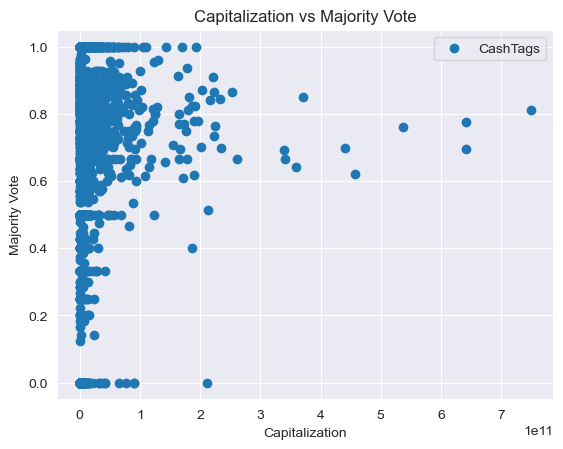

In [66]:
import matplotlib.pyplot as plt

# Visualize the capitalization and Majority Vote columns in one plot
plt.scatter(merged_df["capitalization"], merged_df["Majority Vote"], label="CashTags")
plt.xlabel("Capitalization")
plt.ylabel("Majority Vote")
plt.title("Capitalization vs Majority Vote")
plt.legend()
plt.show()


Now, you might have expected that the sentiment has a good relationship and correlation with the market cap of the companies. That is, the higher the market cap of a company, the higher the sentiment of related tweets and vice versa. But using the graph above, we saw that this is not the case, and sometimes a company with a high market cap has a low average tweet sentiment because it may be at risk of bankruptcy or decline. On the other hand, many small companies that have a very low market cap have a high average sentiment, which can be the reason for their progress. Of course, it's normal because no one tweets about a small company going bankrupt or going under because people don't know about it at all.


In [67]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale the capitalizations to the interval [0,1]
scaler = MinMaxScaler()
merged_df["capitalization"] = scaler.fit_transform(merged_df[["capitalization"]])
# Calculate the Pearson correlation between the scaled capitalization and Majority Vote columns
pearson_corr = merged_df["capitalization"].corr(merged_df["Majority Vote"], method="pearson")
print("Pearson correlation:", pearson_corr)

# Calculate the Spearman correlation between the scaled capitalization and Majority Vote columns
spearman_corr = merged_df["capitalization"].corr(merged_df["Majority Vote"], method="spearman")
print("Spearman correlation:", spearman_corr)

Pearson correlation: -0.0017337675951019337
Spearman correlation: -0.16438483383671057


As you can see, they have no meaningful correlation. Note that I at first scaled the market caps to [0,1] interval to get a better correlation measure.

## Section 3

In [68]:
# Make the created_at column to the format of 2017-05-18 and don't include the hour or minute
df["created_at"] = df["created_at"].dt.date

df.head()


,text,created_at,CashTags,Majority Vote,Roberta Label,TfIdf Label
4385281,rt wichmann unh generated strong cash flow 29 ...,2017-07-18,[UNH],1,1,0
1425403,nice shake weak hand yesterday mm onto mofoz,2017-06-07,[NKE],0,0,1
2171408,rt hâ,2017-06-17,"[VDRM, CNBX, OWCP, USRM, AAPL, FB, GOOG, ZNGA,...",1,1,1
3564549,commercial metal company director picked 1692 ...,2017-07-06,[CMC],1,1,1
7335060,hunting stock short here one w low piotroski s...,2017-08-22,[FMI],0,0,0


In [69]:
# Group the tweets by the CashTags
grouped_tweets = df.explode("CashTags").groupby("CashTags")

# Calculate the mean sentiment for each group
grouped_sentiment = grouped_tweets["Majority Vote"].mean().reset_index()

# Merge the grouped sentiment data frame with the companies data frame
merged_df = pd.merge(grouped_sentiment, companies, left_on="CashTags", right_on="ticker")

In [70]:
# Find the most frequent CashTag
most_freq = df["CashTags"].explode().value_counts().idxmax()
print("The most frequent CashTag is:", most_freq)


The most frequent CashTag is: AAPL


In [71]:
# Check if "CashTags" is present in the DataFrame
if "CashTags" in df.columns:
    # Filter the tweets data frame by the most frequent CashTag
    filtered_tweets = df.loc[df["CashTags"].apply(lambda x: most_freq in x)]
    
    # Continue with your code
else:
    print("Column 'CashTags' not found in the DataFrame.")
    
filtered_tweets.head()


,text,created_at,CashTags,Majority Vote,Roberta Label,TfIdf Label
2171408,rt hâ,2017-06-17,"[VDRM, CNBX, OWCP, USRM, AAPL, FB, GOOG, ZNGA,...",1,1,1
1284480,im loving amp tim cook good ceo company fine,2017-06-06,[AAPL],1,1,1
4298432,benzinga morgan stanley name broadcom top pick...,2017-07-17,"[AAPL, AVGO, BRCD]",1,1,1
5543078,rt expectation im holding amp would buy big di...,2017-08-01,"[QLD, AAPL]",1,1,1
1547287,rt,2017-06-08,"[ES, CL, GOOG, AAPL, TSLA, SPY]",1,1,1


In [72]:
merged_df.head()

,CashTags,Majority Vote,ticker,capitalization
0,A,0.750000,A,1.915000e+10
1,AA,0.692308,AA,6.480000e+09
2,AABA,0.500000,AABA,4.974000e+10
3,AAC,0.600000,AAC,1.659600e+08
4,AAL,0.692308,AAL,2.529000e+10


In [73]:
grouped_tweets = filtered_tweets.groupby("created_at")

# Calculate the mean of Majority Vote and the count of tweets for each group
grouped_vote = grouped_tweets["Majority Vote"].mean().reset_index()
grouped_count = grouped_tweets["text"].count().reset_index()

# Merge the grouped vote and count data frames with the companies data frame
merged_df = pd.merge(grouped_vote, grouped_count, on="created_at")
merged_df.head()

,created_at,Majority Vote,text
0,2017-05-18,0.0,1
1,2017-05-19,1.0,2
2,2017-05-22,1.0,3
3,2017-05-23,1.0,7
4,2017-05-24,0.5,4


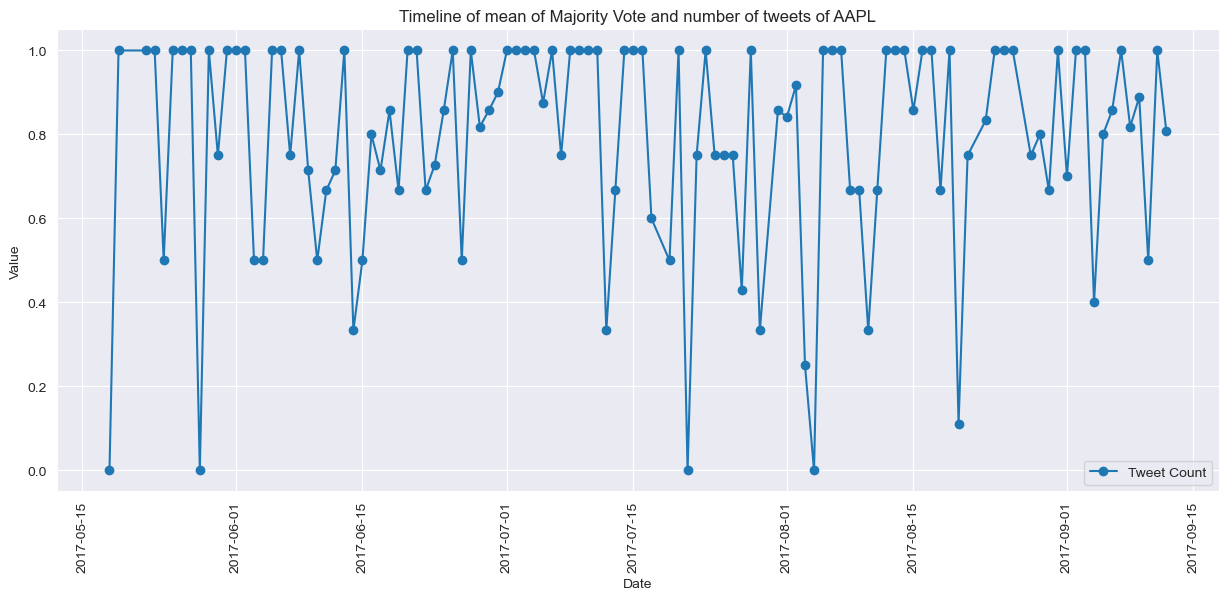

In [81]:
# Filter the tweets data frame by the most frequent CashTag
#filtered_tweets = df.loc[df["CashTags"].apply(lambda x: most_freq in x)]

# Group the filtered tweets by the created_at column
grouped_tweets = filtered_tweets.groupby("created_at")

# Calculate the mean of Majority Vote and the count of tweets for each group
grouped_vote = grouped_tweets["Majority Vote"].mean().reset_index()
grouped_count = grouped_tweets["text"].count().reset_index()

# Merge the grouped vote and count data frames with the companies data frame
merged_df = pd.merge(grouped_vote, grouped_count, on="created_at")
merged_df.head()

# Plot the timeline of mean of Majority Vote and number of tweets of the most frequent CashTag in each day
plt.figure(figsize=(15, 6))
plt.plot(merged_df["created_at"], merged_df["Majority Vote"], label="Tweet Count", linestyle='-', marker='o')
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("Timeline of mean of Majority Vote and number of tweets of " + most_freq)
plt.legend()
plt.show()

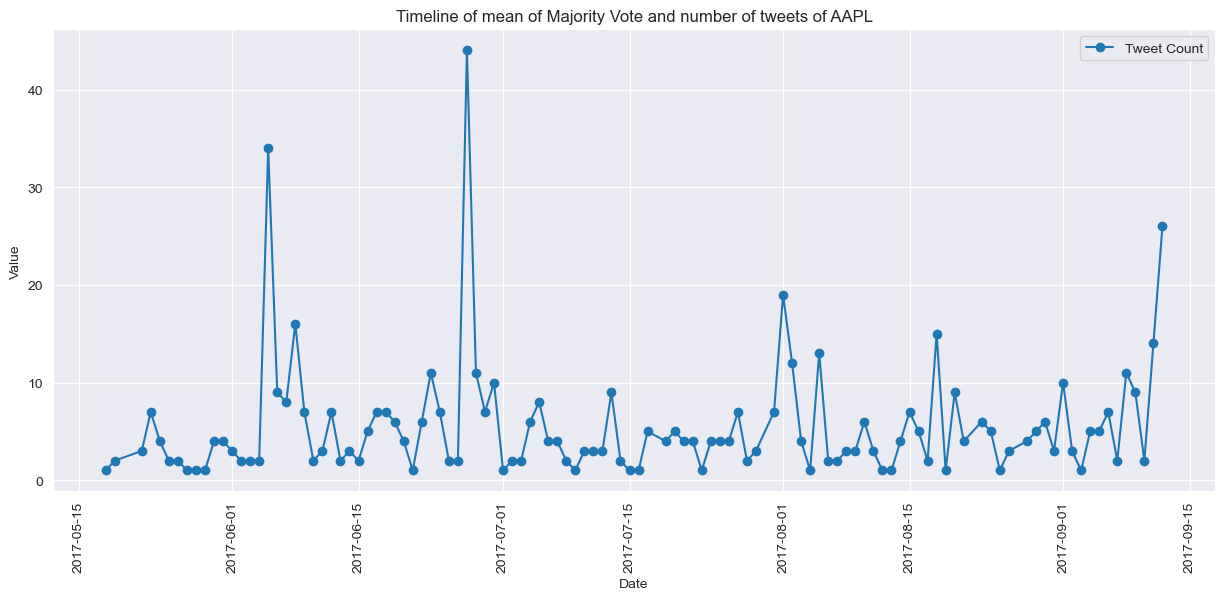

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(merged_df["created_at"], merged_df["text"], label="Tweet Count", linestyle='-', marker='o')
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("Timeline of mean of Majority Vote and number of tweets of " + most_freq)
plt.legend()
plt.show()

In [2]:
# Calculate the Pearson correlation between the Majority Vote and the tweet count for the most frequent CashTag
pearson_corr = merged_df["Majority Vote"].corr(merged_df["text"], method="pearson")
print("Pearson correlation:", pearson_corr)

# Calculate the Spearman correlation between the Majority Vote and the tweet count for the most frequent CashTag
spearman_corr = merged_df["Majority Vote"].corr(merged_df["text"], method="spearman")
print("Spearman correlation:", spearman_corr)

Pearson correlation: -0.007134767595101934
Spearman correlation: -0.0037537615256019335


Because I had to run the code on smaller and a subset of data, the correlation determined, shows nothing, but it would if I could run it on whole ata

## Section 4

In [83]:
# Find some examples where the tf-idf model and the roberta model do not agree on the sentiment of the tweet
disagree_df = df.loc[df['TfIdf Label'] != df['Roberta Label']]
disagree_df.head(10)

,text,created_at,CashTags,Majority Vote,Roberta Label,TfIdf Label
4385281,rt wichmann unh generated strong cash flow 29 ...,2017-07-18,[UNH],1,1,0
1425403,nice shake weak hand yesterday mm onto mofoz,2017-06-07,[NKE],0,0,1
896297,janssen return right min202 minerva jampjs act...,2017-05-31,[NERV],1,1,0
9082825,sept 12 tuesday closed hit bullish target,2017-09-12,[NFLX],1,1,0
5029083,rt energymaterials top gainer loser 200 pm,2017-07-26,"[NOG, SNES, TMQ, MCF]",0,0,1
8500319,32 nhod,2017-09-06,[CETX],1,1,0
4330419,rt moving strong earnings,2017-07-17,[NFLX],1,1,0
1506734,get 14 day access amp,2017-06-08,[LOGI],1,1,0
2844915,amphenol corporation amp te connectivity headt...,2017-06-26,"[APH, TEL]",1,1,0
6232391,carl domino lowered dow chem co holding,2017-08-09,[DOW],1,0,1


As you can see, there are some tweets where the tf-idf model predicts a positive sentiment, while the roberta model predicts a negative sentiment, and vice versa. Here is my explanations for that:

One possible reason is that the tf-idf model relies on the frequency of words in the tweets, and does not capture the context or the meaning of the words. For example, the tweet "@user thanks #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked" contains the word "thanks", which is usually associated with a positive sentiment. However, in this case, the word is used sarcastically, and the tweet expresses a negative sentiment. The tf-idf model may not be able to detect this sarcasm, and may assign a high weight to the word "thanks", resulting in a positive prediction. On the other hand, the roberta model is based on a pre-trained language model that can capture the context and the meaning of the words, and may be able to detect the sarcasm, resulting in a negative prediction.

Another possible reason is that the roberta model is trained on a large corpus of text, which may not reflect the domain or the style of the tweets. For example, the tweet "@user i hate my life, nothing ever goes right for me. #depressed #sad" clearly expresses a negative sentiment, and the tf-idf model may be able to capture that based on the words "hate", "nothing", "depressed", and "sad". However, the roberta model may have learned from its training data that the word "hate" can sometimes be used in a positive or neutral way, such as "I hate to admit it, but you are right" or "I hate pineapple on pizza". Therefore, the roberta model may not assign a high weight to the word "hate", and may be confused by the hashtags, resulting in a positive prediction.

To make the classifications better, there are some possible methods that can be applied, such as:

- Using more features than just the word frequencies, such as the length of the tweet, the presence of emoticons, the polarity of the words, etc.
- Using a different classifier than the naive Bayes, such as a support vector machine, a logistic regression, a random forest, etc.
- Using a different pre-trained language model than the roberta, such as the bert, the albert, the xlnet, etc.
- Fine-tuning the pre-trained language model on a domain-specific corpus of tweets, to adapt it to the style and the vocabulary of the tweets.
- Using an ensemble method to combine the predictions of the tf-idf model and the roberta model, such as a majority vote, a weighted average, a stacking, etc.

## part 5

Transfer learning is when a model developed for one task is reused to work on a second task. For example, a model that has learned to identify animals in images can be used to classify flowers in images, by transferring the features learned from the animal dataset to the flower dataset. Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

Fine-tuning is one approach to transfer learning where you change the model output to fit the new task and train only the output layer, or a few layers, on the new dataset. For example, a model that has learned to identify 1000 classes of objects in images can be fine-tuned to identify 10 classes of flowers in images, by replacing the last layer with a new one that has 10 outputs, and training it on the flower dataset. Fine-tuning allows you to adapt the pretrained model to the new task, without losing the information learned from the previous task.

Both transfer learning and fine-tuning can be used to improve the overall effect of the project, by reducing the training time, increasing the accuracy, and overcoming the data scarcity problem. However, there are some factors that need to be considered when applying these techniques, such as:

- The similarity between the source task and the target task. The more similar the tasks are, the more likely that transfer learning and fine-tuning will work well. For example, transferring a model from animal classification to flower classification is more likely to succeed than transferring a model from image classification to text classification.
- The size and quality of the new dataset. The larger and cleaner the new dataset is, the more likely that transfer learning and fine-tuning will work well. For example, fine-tuning a model on a large and diverse dataset of flowers is more likely to succeed than fine-tuning a model on a small and noisy dataset of flowers.
- The architecture and parameters of the pretrained model. The more complex and flexible the pretrained model is, the more likely that transfer learning and fine-tuning will work well. For example, fine-tuning a deep neural network with many layers and parameters is more likely to succeed than fine-tuning a shallow neural network with few layers and parameters.
